# CS498 Project, Team 31, Phase 1
## Sentiment Analysis of Social Media as a predictor for Bitcoin price volatility

Phase 1 of the project will be to conduct a data exploration of the cryptocurrency historical datasets to ascertain if a correlation can be drawn between Bitcoin price fluctuations and the other major cryptocurrencies. The comparison will be done using the top ten cryptocurrencies by market share. The top ten were chosen based by market cap as of Dec. 7, 2017, according to CoinMarketCap.com. The historical data will be restricted to the last 90 days of the year 2017.

1. Bitcoin (BTC): \$304.52 billion
2. Ethereum (ETH): \$41.55 billion
3. Bitcoin Cash (BCH): \$22.02 billion
4. IOTA (IOT): \$11.59 billion
5. Ripple (XRP): \$8.68 billion
6. Dash (DASH): \$5.38 billion
7. Litecoin (LTC): \$5.32 billion
8. Monero (XMR): \$4.33 billion
9. Bitcoin Gold (BTG): \$4.22 billion
10. Cardano (ADA): \$2.78 billion
11. Ethereum Classic (ETC): \$2.62 billion
12. Stellar Lumens (XLM): \$2.53 billion
13. NEO (NEO): \$2.23 billion

#### Because some coins didnt start trading until late 2017, the following substitutions were made:
* Ethereum classic was exchanged for IOTA
* Stellar Lumens was exchanged for Cardano
* Neo was exchanged for Bitcoin Gold


The datasets used were downloaded from the [CryptoCompare public API](https://www.cryptocompare.com/api/#introduction), we can use the following Python wrapper available on [GitHub: cryCompare](https://github.com/stefs304/cryCompare) to simplfy the API usage.


In [34]:
# Standard Data Science libraires to be used
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import operator
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import sys

# This path will need to be modified based on where to save the crycompare library
sys.path.append("C:/Users/Michael/notebooks/CS498/crycompare/")
from crycompare import history as h 
from crycompare import price as p 

%matplotlib inline

In [2]:
# Fetch a coin list from CryptoCompare and create a sub list with only coins of interest.
top10_coins = ['BTC', 'ETH', 'BCH', 'ETC','XRP', 'DASH', 'LTC', 'XMR', 'NEO', 'XLM'] # The top ten coins for 2017
# It was not necessary to fetch the coin list, since it is simpler to create a list of the coins we want to fetch.
# coinList = p.coinList()
# top10_coinList = dict((k, coinList[k]) for k in top10_coins if k in coinList)
coins = sorted(top10_coins)
print(coins)

['BCH', 'BTC', 'DASH', 'ETC', 'ETH', 'LTC', 'NEO', 'XLM', 'XMR', 'XRP']


With the histoDay() function, we can fetch the historical data (OHLC prices and volumes) open-high-low-close chart. This cell is now a markdown cell. Since we all ready fetched and pickeled the data down below.

```python
df_dict = {}
for coin in coins:
    # limit to 90 days. toTs = 12/31/2017. The website https://www.unixtimestamp.com/ can be used tio create the 
    # appropriate timestamp.
    history = h.histoDay(coin, 'USD', limit=89, toTs=1514678400, allData=False)
    if histo:
        df_history = pd.DataFrame(history)
        df_history['time'] = pd.to_datetime(df_history['time'],unit='s')
        df_history.index = df_history['time']
        del df_history['time']
        del df_history['volumefrom']
        del df_history['volumeto']
        
        df_dict[coin] = df_history
```

In [7]:
# We store all info in a dataframe with 2-level columns: 
# the first level contains the coin names, the second one, the OHLC prices.
# top10_coin_history = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
# We reset the index so the times (dates) are a now a column
# top10_coin_history.reset_index(level=0, inplace=True)

In [2]:
# We want to save the dataframe so we don't need to access the CryptoCompare API every time
# We are using pickle to save the data. The data was retieved and pickeled on 03/16/2018
import pickle
# top10_coin_history.to_pickle("data/top10_coins.pkl")  

In [6]:
# Here we reload the pickled dataframe
top10_coin_history = pickle.load(open("data/top10_coins.pkl", "rb" ))

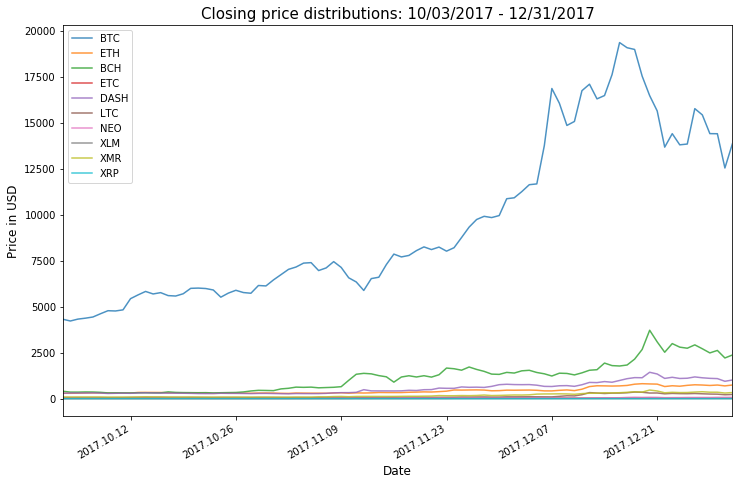

In [6]:
# The first step is to plot the closing price of our chosen crypto currencies and observe how the price has changed over time.
# The dataset is unmodified
import matplotlib.dates as mdates
import datetime
top10_coin_history['Date_map'] = top10_coin_history['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('BTC', 'close')], alpha=0.8, color=color[0], label="BTC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('ETH', 'close')], alpha=0.8, color=color[1], label="ETH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('BCH', 'close')], alpha=0.8, color=color[2], label="BCH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('ETC', 'close')], alpha=0.8, color=color[3], label="ETC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('DASH', 'close')], alpha=0.8, color=color[4], label="DASH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('LTC', 'close')], alpha=0.8, color=color[5], label="LTC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('NEO', 'close')], alpha=0.8, color=color[6], label="NEO")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XLM', 'close')], alpha=0.8, color=color[7], label="XLM")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XMR', 'close')], alpha=0.8, color=color[8], label="XMR")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XRP', 'close')], alpha=0.8, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distributions: 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()

In [30]:
# The price levels will need to be normalized to make a better comparison of the crypto currencies.
# based on https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name == ('time', ''):
            result[feature_name] = df[feature_name]
        else:  
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [31]:
# Here we reload the pickled dataframe
top10_coin_history = pickle.load(open("data/top10_coins.pkl", "rb" ))
# Use min/max normaliztion
normalized_coin_df = normalize(top10_coin_history)
# Save the datafram between sessions
normalized_coin_df.to_pickle("data/normalized_coin.pkl") 

In [32]:
# Display for confirmation
normalized_coin_df.head()

time       BCH                                     BTC            \
                 close      high       low      open     close      high   
0 2017-10-03  0.026679  0.027102  0.043047  0.032044  0.006315  0.005201   
1 2017-10-04  0.013270  0.022498  0.026841  0.026679  0.000000  0.000000   
2 2017-10-05  0.012874  0.013253  0.023898  0.013270  0.006795  0.000675   
3 2017-10-06  0.015464  0.014940  0.027467  0.012874  0.010133  0.004309   
4 2017-10-07  0.014463  0.013261  0.027972  0.015464  0.014355  0.007582   

                           DASH    ...          XLM                 XMR  \
        low      open     close    ...          low      open     close   
0  0.005982  0.012074  0.026731    ...     0.000000  0.003912  0.025779   
1  0.002753  0.006314  0.034268    ...     0.000845  0.001972  0.018625   
2  0.000000  0.000000  0.036003    ...     0.001127  0.000000  0.022892   
3  0.010514  0.006794  0.036515    ...     0.011372  0.008810  0.020733   
4  0.012057  0.010132  0.041275    ...     0.025067  0.021598  0.022189   

                                      XRP                                
       high       low      open     close      high       low      open  
0  0.022092  0.024529  0.021910  0.007264  0.002723  0.014111  0.006958  
1  0.019198  0.029198  0.026064  0.012963  0.007545  0.016118  0.007073  
2  0.016175  0.026728  0.018925  0.026653  0.019688  0.023769  0.012938  
3  0.017131  0.033427  0.023182  0.024082  0.019778  0.036187  0.027027  
4  0.016072  0.031701  0.021027  0.027602  0.018304  0.035685  0.024382  

[5 rows x 41 columns]

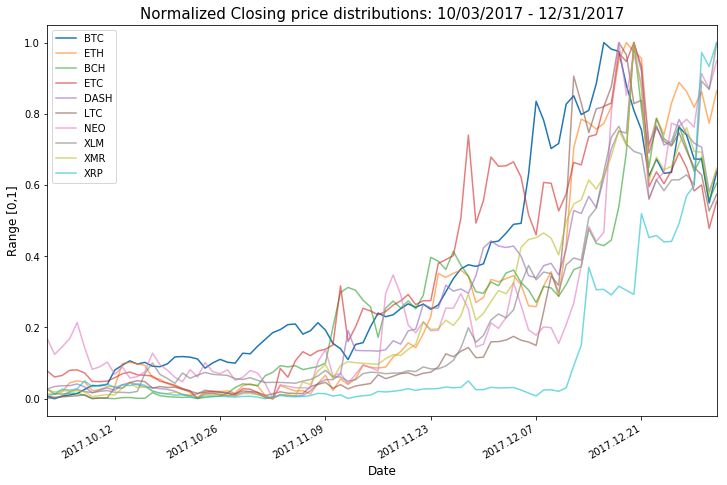

In [37]:
# The second step is to plot the normailzed closing price of our chosen crypto currencies 
# and observe if this gices us a better intuition about the relatioship between coincs
# The dataset has been normalized
import matplotlib.dates as mdates
import datetime
normalized_coin_df['Date_map'] = normalized_coin_df['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('BTC', 'close')], alpha=1.0, color=color[0], label="BTC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('ETH', 'close')], alpha=0.6, color=color[1], label="ETH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('BCH', 'close')], alpha=0.6, color=color[2], label="BCH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('ETC', 'close')], alpha=0.6, color=color[3], label="ETC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('DASH', 'close')], alpha=0.6, color=color[4], label="DASH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('LTC', 'close')], alpha=0.6, color=color[5], label="LTC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('NEO', 'close')], alpha=0.6, color=color[6], label="NEO")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XLM', 'close')], alpha=0.6, color=color[7], label="XLM")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XMR', 'close')], alpha=0.6, color=color[8], label="XMR")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XRP', 'close')], alpha=0.6, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Range [0,1]', fontsize=12)
plt.title("Normalized Closing price distributions: 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()